## Exploration

Importing libraries for preprocessing, visualization, and exploration.

In [1]:
import nltk
from nltk.corpus import stopwords
import string
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize, FreqDist
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from functions import *
%matplotlib inline
wml = WordNetLemmatizer()

Importing dataset and encoding it in 'unicode_escape' due to some characters not being from the english language.

In [2]:
data = pd.read_csv('data.csv', encoding= 'unicode_escape')

Preview of top 5 rows. 

In [3]:
data.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


Removing column 'emotion_in_tweet_is_directed_at' due to column not being part of analysis.

In [4]:
data = data.drop('emotion_in_tweet_is_directed_at',1)

Getting info of pandas data frame.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 2 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(2)
memory usage: 142.2+ KB


Checking unique values of 'is_there_an_emotion_directed_at_a_brand_or_product'.

In [6]:
data.is_there_an_emotion_directed_at_a_brand_or_product.unique()

array(['Negative emotion', 'Positive emotion',
       'No emotion toward brand or product', "I can't tell"], dtype=object)

Checking NaN values of 'tweet_text'

In [7]:
data.tweet_text.isna().sum()

1

Checking 'I can't tell' categorie in 'is_there_an_emotion_directed_at_a_brand_or_product'.

In [8]:
data[data.is_there_an_emotion_directed_at_a_brand_or_product == "I can't tell"]

,tweet_text,is_there_an_emotion_directed_at_a_brand_or_product
90,Thanks to @mention for publishing the news of ...,I can't tell
102,ÛÏ@mention &quot;Apple has opened a pop-up st...,I can't tell
237,Just what America needs. RT @mention Google to...,I can't tell
341,The queue at the Apple Store in Austin is FOUR...,I can't tell
368,Hope it's better than wave RT @mention Buzz is...,I can't tell
...,...,...
9020,It's funny watching a room full of people hold...,I can't tell
9032,"@mention yeah, we have @mention , Google has n...",I can't tell
9037,"@mention Yes, the Google presentation was not ...",I can't tell
9058,&quot;Do you know what Apple is really good at...,I can't tell


Renaming 'tweet_text' to 'tweet; and 'is_there_an_emotion_directed_at_a_brand_or_product' to 'emotion' for ease of use.

In [9]:
data = data.rename(columns={"tweet_text":'tweet','is_there_an_emotion_directed_at_a_brand_or_product':'emotion'})

Removing 'I can't tell' from emotion and NaN values from tweet.

In [10]:
data = data.loc[(data.emotion != "I can't tell") & (data.tweet.isna() != True)]
data

,tweet,emotion
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Positive emotion
...,...,...
9088,Ipad everywhere. #SXSW {link},Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,No emotion toward brand or product


Renaming categories in emotion from 'Positive emotion', 'Negative Emotion', and 'Neutral Emotion' to 'positive', 'negative', and 'neutral' respectably. 

In [11]:
data.emotion = data.emotion.map(lambda x: 'positive' if x == 'Positive emotion' else 'negative' if x == 'Negative emotion' else 'neutral')
data

,tweet,emotion
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,negative
1,@jessedee Know about @fludapp ? Awesome iPad/i...,positive
2,@swonderlin Can not wait for #iPad 2 also. The...,positive
3,@sxsw I hope this year's festival isn't as cra...,negative
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,positive
...,...,...
9088,Ipad everywhere. #SXSW {link},positive
9089,"Wave, buzz... RT @mention We interrupt your re...",neutral
9090,"Google's Zeiger, a physician never reported po...",neutral
9091,Some Verizon iPhone customers complained their...,neutral


Separating positive, negative, and neutral from emotions and visualizating quantity of data. 

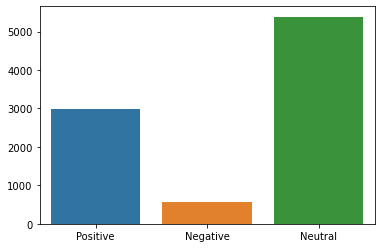

In [12]:
positive = data.loc[data.emotion == 'positive']
negative = data.loc[data.emotion == 'negative']
neutral = data.loc[data.emotion == 'neutral']
sns.barplot(['Positive','Negative','Neutral'],[positive.count()[0],negative.count()[0],neutral.count()[0]])

Tokenizing words from positive, negative, and neutral category.

In [13]:
tokenizedPositive = [word_tokenize(i) for i in positive.tweet]
tokenizedNegative = [word_tokenize(i) for i in negative.tweet]
tokenizedNeutral = [word_tokenize(i) for i in neutral.tweet]

Checking unique words from each emotion category. 

In [14]:
posUnique = uniqueWords(tokenizedPositive)
negUnique = uniqueWords(tokenizedNegative)
neutUnique = uniqueWords(tokenizedNeutral)
print('Unique Positive {}'.format(posUnique))
print('Unique Negative {}'.format(negUnique))
print('Unique Neutral {}'.format(neutUnique))

Unique Positive 6692
Unique Negative 2574
Unique Neutral 9784


Cleaning tokenized categories by removing stopwords and punctuation. 

In [15]:
cleanPositive = cleanTokenList(tokenizedPositive)
cleanNegative = cleanTokenList(tokenizedNegative)
cleanNeutral = cleanTokenList(tokenizedNeutral)

Lemmatizing words in cleaned lists.

In [16]:
lemPositive = [wml.lemmatize(i) for i in cleanPositive]
lemNegative = [wml.lemmatize(i) for i in cleanNegative]
lemNeutral = [wml.lemmatize(i) for i in cleanNeutral]

Checking frequency of words. 

In [17]:
freqPositive = FreqDist(lemPositive)
freqNegative = FreqDist(lemNegative)
freqNeutral = FreqDist(lemNeutral)

Ordering frequency dictionary by value.

In [18]:
orderedPositive = {k: v for k, v in sorted(freqPositive.items(), key=lambda item: item[1],reverse= True)}
orderedNegative = {k: v for k, v in sorted(freqNegative.items(), key=lambda item: item[1],reverse= True)}
orderedNeutral = {k: v for k, v in sorted(freqNeutral.items(), key=lambda item: item[1],reverse= True)}

Visualizing ordered frequency for positive, negative, and neutral category. 

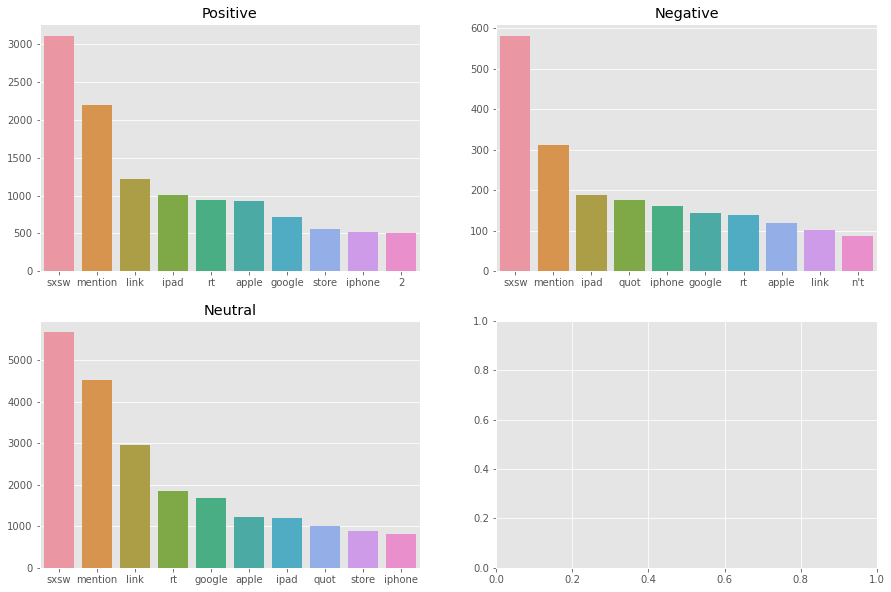

In [19]:
with plt.style.context('ggplot'):
    fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(15,10))
    orderedData = [orderedPositive,orderedNegative,orderedNeutral]
    title = ['Positive','Negative','Neutral']
    i = 0
    for row in ax:
        for col in row:
            x = list(orderedData[i].keys())[:10]
            y = list(orderedData[i].values())[:10]
            sns.barplot(x,y,ax=col)
            col.title.set_text(title[i])
            i += 1
            if i == 3:
                break
        if i == 3:
            break

Finding unique words for positive and negative emotion.

In [20]:
positiveWords = [word for word in lemPositive if word not in lemNegative]
negativeWords = [word for word in lemNegative if word not in lemPositive]

Checking frequency of words.

In [21]:
freqPositiveWords = FreqDist(positiveWords)
negativeWords = FreqDist(negativeWords)

Ordering frequency dictionary by value.

In [22]:
orderedPositiveWords = {k: v for k, v in sorted(freqPositiveWords.items(), key=lambda item: item[1],reverse= True)}
orderedNegativeWords = {k: v for k, v in sorted(negativeWords.items(), key=lambda item: item[1],reverse= True)}

visualizing unique positive and negative words.

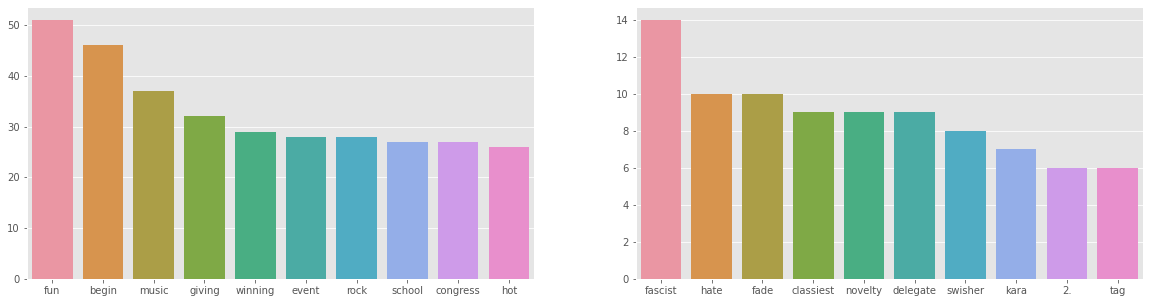

In [23]:
with plt.style.context('ggplot'):
    orderedData = [orderedPositiveWords,orderedNegativeWords]
    i = 0
    fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(20,5))
    for col in ax:
        x = list(orderedData[i].keys())[:10]
        y = list(orderedData[i].values())[:10]
        i += 1
        sns.barplot(x,y,ax=col)
        

## Analysis

Importing classifiers, metrics, and modeling tools.

In [24]:
from sklearn.metrics import f1_score,accuracy_score,recall_score,precision_score,confusion_matrix,classification_report
from sklearn.multiclass import OneVsOneClassifier,OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier as xgbc
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
vectorizer = TfidfVectorizer()

### Iteration 1 (Binary)

Making binary data frame by removing 'neutral' emotion.

In [25]:
binaryData = data.loc[data.emotion != 'neutral']

Cleaning tweets and making positive = 1 and negative = 0.

In [26]:
binaryTweet = binaryData.tweet.map(cleanTweets)
binaryTweetTarget = binaryData.emotion.map(lambda x: 1 if x=='positive' else 0)

Vectorizing tweets.

In [27]:
binaryVectorTweet = vectorizer.fit_transform(binaryTweet)

In [28]:
binaryVectorTweet.shape

(3548, 5550)

splitting tweets into train and test sets.

In [29]:
X_train, X_test, y_train, y_test = train_test_split(binaryVectorTweet,binaryTweetTarget,random_state=0)

Using multiple vanilla classifiers and compaing their results.

In [30]:
algos = {'Logistic Regression':LogisticRegression(),'K-Neighbors':KNeighborsClassifier(),
         'Decision Tree':DecisionTreeClassifier(),'Random Forest':RandomForestClassifier(),
         'AdaBoost':AdaBoostClassifier(),'Gradient Boost':GradientBoostingClassifier(),
         'XGBoost Classifier':xgbc(),'SVC':SVC(),'Naive Bayes':MultinomialNB()}

In [190]:
modelDF = ModelCompare(algos,X_train,y_train,X_test,y_test)
modelDF.sort_values('Test Accuracy',0,False)

,Models,Training Accuracy,Test Accuracy,F1 Train,F1 Test
7,SVC,0.976325,0.866967,0.986126,0.925786
6,XGBoost Classifier,0.949267,0.862458,0.970722,0.921795
3,Random Forest,1.000000,0.861330,1.000000,0.922593
5,Gradient Boost,0.879369,0.851184,0.933139,0.917500
4,AdaBoost,0.877490,0.850056,0.931224,0.915769
0,Logistic Regression,0.862834,0.845547,0.924633,0.914960
1,K-Neighbors,0.888388,0.842165,0.937063,0.911839
8,Naive Bayes,0.853814,0.839910,0.920107,0.912237
2,Decision Tree,1.000000,0.830891,1.000000,0.901055


### Iteration 2

Finding common words between positive and negative emotions.

In [32]:
allWords = lemPositive + lemNegative
commonWords = [word for word in allWords if (word not in positiveWords) and (word not in negativeWords)]

Cleaning tweets and removing common words. Making positive = 1 and negative = 0.

In [33]:
tweetsUniqueWords = binaryData.tweet.map(lambda x: cleanTweets(x,commonWords))
tweetsUniqueTarget = binaryData.emotion.map(lambda x: 1 if x=='positive' else 0)

Vectorizing tweets.

In [34]:
tweetsUniqueVector = vectorizer.fit_transform(tweetsUniqueWords)

In [35]:
tweetsUniqueVector.shape

(3548, 4846)

Splitting set into train and test set.

In [36]:
X_trainUnique, X_testUnique, y_trainUnique, y_testUnique = train_test_split(tweetsUniqueVector, tweetsUniqueTarget, random_state=0)

Using multiple algorithms and comparing results.

In [191]:
modelDF = ModelCompare(algos,X_trainUnique,y_trainUnique,X_testUnique,y_testUnique)
modelDF.sort_values('Test Accuracy',0,False)

,Models,Training Accuracy,Test Accuracy,F1 Train,F1 Test
3,Random Forest,0.980083,0.883878,0.988308,0.934101
2,Decision Tree,0.980083,0.871477,0.988287,0.926070
7,SVC,0.974070,0.868095,0.984832,0.926276
4,AdaBoost,0.882751,0.850056,0.934316,0.916088
8,Naive Bayes,0.891770,0.850056,0.939597,0.917237
6,XGBoost Classifier,0.876738,0.848929,0.931438,0.915617
5,Gradient Boost,0.873732,0.847802,0.930233,0.915678
1,K-Neighbors,0.884630,0.841037,0.935054,0.910362
0,Logistic Regression,0.856821,0.837655,0.921621,0.910891


### Iteration 1 (Ternary Model)

Cleaning tweets and turning neutral = 2, positive = 1, and negative = 0.

In [38]:
allDataTweet = data.tweet.map(cleanTweets)
allDataTarget = data.emotion.map(lambda x: 2 if x=='neutral' else 1 if x=='positive' else 0)

Vectorizing tweets.

In [39]:
allDataVector = vectorizer.fit_transform(allDataTweet)

In [40]:
allDataVector.shape

(8936, 8945)

Splitting data set into train and test set.

In [41]:
X_trainMulti, X_testMulti, y_trainMulti, y_testMulti = train_test_split(allDataVector, allDataTarget, random_state=0)

Using multiple algorithms and optimzing them for ternary models.

In [42]:
multiClassAlgos = {'Random Forest':RandomForestClassifier(),'K-Neighbors':KNeighborsClassifier(),
                  'Logistic Regression': LogisticRegression(max_iter=200,multi_class='multinomial'),'SVC':OneVsOneClassifier(SVC()),
                   'Gradient Boost':OneVsRestClassifier(GradientBoostingClassifier()),'Decision Tree':DecisionTreeClassifier(),
                  'XGBoost Classifier':xgbc(),'Naive Bayes':MultinomialNB()}

Comparing models by accuracy and confusion matrices.  

In [43]:
ModelCompareMulti(multiClassAlgos,X_trainMulti,y_trainMulti,X_testMulti,y_testMulti,labels=[0,1,2])

Random Forest
Training Accuracy: 0.994330050731125
[[  18   14  120]
 [   1  278  457]
 [  11  126 1209]]
              precision    recall  f1-score   support

           0       0.60      0.12      0.20       152
           1       0.67      0.38      0.48       736
           2       0.68      0.90      0.77      1346

    accuracy                           0.67      2234
   macro avg       0.65      0.46      0.48      2234
weighted avg       0.67      0.67      0.64      2234

K-Neighbors
Training Accuracy: 0.7572366457773799
[[  29   38   85]
 [  15  287  434]
 [  32  223 1091]]
              precision    recall  f1-score   support

           0       0.38      0.19      0.25       152
           1       0.52      0.39      0.45       736
           2       0.68      0.81      0.74      1346

    accuracy                           0.63      2234
   macro avg       0.53      0.46      0.48      2234
weighted avg       0.61      0.63      0.61      2234

Logistic Regression
Trainin

### Iteration 2

Getting all unique positive, negative, and neutral words.

In [44]:
allPositiveWords = [word for word in lemPositive if (word not in lemNegative) & (word not in lemNeutral)]
allNegativeWords = [word for word in lemNegative if (word not in lemPositive) & (word not in lemNeutral)]
allNeutralWords = [word for word in lemNeutral if (word not in lemNegative) & (word not in lemPositive)]

Checking frequency of words.

In [171]:
freqAllPositive = FreqDist(allPositiveWords)
freqAllNegative = FreqDist(allNegativeWords)
freqAllNeutral = FreqDist(allNeutralWords)

Ordering frequency dictionaries by values.

In [172]:
orderedAllPositiveWords = {k: v for k, v in sorted(freqAllPositive.items(), key=lambda item: item[1],reverse= True)}
orderedAllNegativeWords = {k: v for k, v in sorted(freqAllNegative.items(), key=lambda item: item[1],reverse= True)}
orderedAllNeutralWords = {k: v for k, v in sorted(freqAllNeutral.items(), key=lambda item: item[1],reverse= True)}

Visualizing dictionaries.

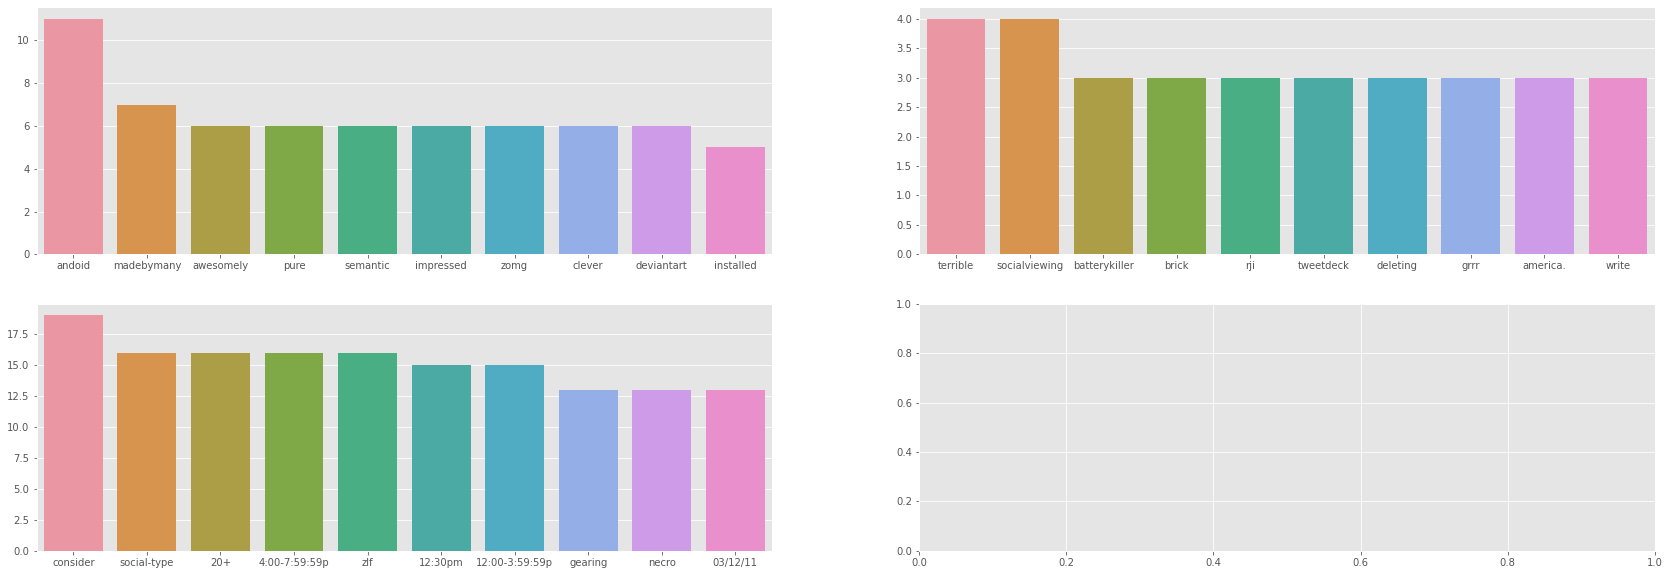

In [186]:
with plt.style.context('ggplot'):
    fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(29,10))
    orderedData = [orderedAllPositiveWords,orderedAllNegativeWords,orderedAllNeutralWords]
    i = 0
    for row in ax:
        for col in row:
            x = list(orderedData[i].keys())[:10]
            y = list(orderedData[i].values())[:10]
            sns.barplot(x,y,ax=col)
            i += 1
            if i == 3:
                break
        if i == 3:
            break

Finding common words from positive, negative, and neutral.

In [45]:
allWordsDataset = lemPositive + lemNegative + lemNeutral
commonWordsDataset = [word for word in allWords if (word not in allPositiveWords) and (word not in allNegativeWords) and (word not in allNeutralWords)]

Cleaning tweets and removing commong words. Turning neutral = 2, positive = 1, and negative = 0.

In [46]:
allDataTweetUnique = data.tweet.map(lambda x: cleanTweets(x,commonWords))
allDataTargetUnique = data.emotion.map(lambda x: 2 if x=='neutral' else 1 if x=='positive' else 0)

Vectorizing tweets.

In [47]:
allDataVectorUnique = vectorizer.fit_transform(allDataTweetUnique)

In [48]:
allDataVectorUnique.shape

(8936, 8355)

Splitting set into test and train set.

In [49]:
X_trainMultiUnique, X_testMultiUnique, y_trainMultiUnique, y_testMultiUnique = train_test_split(allDataVectorUnique, 
                                                                                                allDataTargetUnique, random_state=0)

Compaing algorithms by accuracy and confusion matrices.

In [50]:
ModelCompareMulti(multiClassAlgos,X_trainMultiUnique,y_trainMultiUnique,
                  X_testMultiUnique,y_testMultiUnique,labels=[0,1,2])

Random Forest
Training Accuracy: 0.9192778275141749
[[  41    7  104]
 [   6  267  463]
 [  25  183 1138]]
              precision    recall  f1-score   support

           0       0.57      0.27      0.37       152
           1       0.58      0.36      0.45       736
           2       0.67      0.85      0.75      1346

    accuracy                           0.65      2234
   macro avg       0.61      0.49      0.52      2234
weighted avg       0.63      0.65      0.62      2234

K-Neighbors
Training Accuracy: 0.7442554461354819
[[  26   13  113]
 [  14  200  522]
 [  35  188 1123]]
              precision    recall  f1-score   support

           0       0.35      0.17      0.23       152
           1       0.50      0.27      0.35       736
           2       0.64      0.83      0.72      1346

    accuracy                           0.60      2234
   macro avg       0.49      0.43      0.43      2234
weighted avg       0.57      0.60      0.57      2234

Logistic Regression
Traini

### Synthetic Sampling

Importing SMOTE.

In [90]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 0)

Synthetic sampling ternary model data. 

In [94]:
X_trainMultiResample, y_trainMultiResample = sm.fit_sample(X_trainMulti,y_trainMulti)

Comparing algorithms.

In [95]:
ModelCompareMulti(multiClassAlgos,X_trainMultiResample,y_trainMultiResample,X_testMulti,y_testMulti,labels=[0,1,2])

Random Forest
Training Accuracy: 0.9967837704106878
[[  31   25   96]
 [   4  346  386]
 [  15  187 1144]]
              precision    recall  f1-score   support

           0       0.62      0.20      0.31       152
           1       0.62      0.47      0.53       736
           2       0.70      0.85      0.77      1346

    accuracy                           0.68      2234
   macro avg       0.65      0.51      0.54      2234
weighted avg       0.67      0.68      0.66      2234

K-Neighbors
Training Accuracy: 0.7642256308758041
[[121  26   5]
 [224 441  71]
 [474 492 380]]
              precision    recall  f1-score   support

           0       0.15      0.80      0.25       152
           1       0.46      0.60      0.52       736
           2       0.83      0.28      0.42      1346

    accuracy                           0.42      2234
   macro avg       0.48      0.56      0.40      2234
weighted avg       0.66      0.42      0.44      2234

Logistic Regression
Training Accura

Synthetic sampling ternary data set with unique words.

In [99]:
X_trainMultiUniqueResample, y_trainMultiUniqueResample = sm.fit_sample(X_trainMultiUnique,y_trainMultiUnique)

Comparing models.

In [100]:
ModelCompareMulti(multiClassAlgos,X_trainMultiUniqueResample,y_trainMultiUniqueResample,
                  X_testMultiUnique,y_testMultiUnique,labels=[0,1,2])

Random Forest
Training Accuracy: 0.91753257463302
[[101  11  40]
 [145 346 245]
 [253 299 794]]
              precision    recall  f1-score   support

           0       0.20      0.66      0.31       152
           1       0.53      0.47      0.50       736
           2       0.74      0.59      0.65      1346

    accuracy                           0.56      2234
   macro avg       0.49      0.57      0.49      2234
weighted avg       0.63      0.56      0.58      2234

K-Neighbors
Training Accuracy: 0.694210786739238
[[ 97   5  50]
 [120 369 247]
 [333 408 605]]
              precision    recall  f1-score   support

           0       0.18      0.64      0.28       152
           1       0.47      0.50      0.49       736
           2       0.67      0.45      0.54      1346

    accuracy                           0.48      2234
   macro avg       0.44      0.53      0.43      2234
weighted avg       0.57      0.48      0.50      2234

Logistic Regression
Training Accuracy: 0.861702

Synthetic sampling binary data set. 

In [101]:
X_trainResample, y_trainResample = sm.fit_sample(X_train,y_train)

Comparing models.

In [102]:
modelDF = ModelCompare(algos,X_trainResample,y_trainResample,X_test,y_test)
modelDF.sort_values('F1 Test',0,False)

,Models,Training Accuracy,Test Accuracy,F1 Train,F1 Test
7,SVC,0.997321,0.877114,0.997321,0.930969
3,Random Forest,1.000000,0.868095,1.000000,0.925144
6,XGBoost Classifier,0.971205,0.861330,0.971975,0.921103
0,Logistic Regression,0.966518,0.855693,0.966186,0.912925
4,AdaBoost,0.866071,0.833145,0.870466,0.900538
5,Gradient Boost,0.909598,0.829763,0.911937,0.898861
8,Naive Bayes,0.957366,0.832018,0.956162,0.895292
2,Decision Tree,1.000000,0.817362,1.000000,0.890836
1,K-Neighbors,0.677679,0.379932,0.524374,0.413646


Synthetic sampling binary unique data set.

In [103]:
X_trainUniqueResample, y_trainUniqueResample = sm.fit_sample(X_trainUnique,y_trainUnique)

Comparing models.

In [104]:
modelDF = ModelCompare(algos,X_trainUniqueResample,y_trainUniqueResample,X_testUnique,y_testUnique)
modelDF.sort_values('F1 Test',0,False)

,Models,Training Accuracy,Test Accuracy,F1 Train,F1 Test
6,XGBoost Classifier,0.886830,0.843292,0.896170,0.909564
5,Gradient Boost,0.761830,0.833145,0.803680,0.904762
4,AdaBoost,0.689063,0.829763,0.757613,0.903391
7,SVC,0.961830,0.809470,0.960462,0.887408
0,Logistic Regression,0.954241,0.773393,0.952314,0.847380
8,Naive Bayes,0.951562,0.760992,0.949405,0.836420
3,Random Forest,0.962946,0.711387,0.961610,0.799373
2,Decision Tree,0.962946,0.659526,0.961574,0.753268
1,K-Neighbors,0.711830,0.378805,0.597443,0.410695


### Iteration 3 (Binary and Ternary)

Using gridsearch to tune best performing algorithms.

In [135]:
from sklearn.model_selection import GridSearchCV as grid

Initializing best performing algorithms.

In [137]:
rf = RandomForestClassifier()
svc = OneVsOneClassifier(SVC())

Fitting algorithms with best performing data set.

In [123]:
modelRF = rf.fit(X_trainUnique,y_trainUnique)
modelSVC = svc.fit(X_trainMulti,y_trainMulti)

Testing.

In [125]:
resultsRF = modelRF.predict(X_testUnique)
resultsSVC = modelSVC.predict(X_testMulti)

Analyzing Random Forest by confusion matrix and analyzing classifiaction report.

In [188]:
print('Random Forest')
print(confusion_matrix(y_testUnique,resultsRF))
print(classification_report(y_testUnique,resultsRF))

Random Forest
[[ 52  97]
 [  7 731]]
              precision    recall  f1-score   support

           0       0.88      0.35      0.50       149
           1       0.88      0.99      0.93       738

    accuracy                           0.88       887
   macro avg       0.88      0.67      0.72       887
weighted avg       0.88      0.88      0.86       887



Analysing SVC by confusion matrix and classification report.

In [187]:
print('SVC')
print(confusion_matrix(y_testMulti,resultsSVC))
print(classification_report(y_testMulti,resultsSVC))

SVC
[[  17    9  126]
 [   0  309  427]
 [   5  120 1221]]
              precision    recall  f1-score   support

           0       0.77      0.11      0.20       152
           1       0.71      0.42      0.53       736
           2       0.69      0.91      0.78      1346

    accuracy                           0.69      2234
   macro avg       0.72      0.48      0.50      2234
weighted avg       0.70      0.69      0.66      2234



Running Grid Search on Random Forest Classifier. Grid Search ran on google colab.

In [ ]:
'''rfParams = {'n_estimators':[90,95,100,105,110],'criterion':['gini','entropy'],
            'min_samples_split':[2,3,4,5],'min_samples_leaf':[1,2,3,4,5],
            'min_weight_fraction_leaf':[0,.1,.2,.3,.4,.5],
            'max_features':['auto', 'sqrt', 'log2'],'bootstrap':[True,False]}

gridRF = grid(rf,rfParams,scoring='accuracy',n_jobs=-1)

gridRF.fit(X_trainUnique,y_trainUnique)

gridRF.best_params_

output:
{bootstrap:'False'
criterion:'entropy'
max_features:'log2'
min_sample_leaf:1
min_sample_split:2
min_weight_fraction_leaf:0
n_estimators:100
}

'''

Running Grid Search on SVC. Grid Search ran on google colab.

In [ ]:
'''svcParams = {'estimator__C':[2,3],'estimator__kernel':['linear','poly','rbf','sigmoid','precomputer'],
             'estimator__degree':[1,2,3,4,5],'estimator__coef0':[0,1,2,3,4,5],'estimator__gamma':['scale','auto'],
         'estimator__shrinking':[True,False],'estimator__decision_function_shape':['ovo','ovr']}

gridSVC = grid(svc,svcParams,scoring = 'accuracy',n_jobs=-1)

gridSVC.fit(X_trainMulti,y_trainMulti)

gridSVC.best_params
'''

Tuned algorithms with Grid Search parameters.

In [167]:
tunedRF = RandomForestClassifier(criterion='entropy',max_features='log2',bootstrap=False)

Fitting data.

In [168]:
tunedRF.fit(X_trainUnique,y_trainUnique)

RandomForestClassifier(bootstrap=False, criterion='entropy',
                       max_features='log2')

Testing.

In [169]:
resultsTunedRF = tunedRF.predict(X_testUnique)

Analyzing tuned Random Forest Classifier.

In [189]:
print('Random Forest Tuned')
print(confusion_matrix(y_testUnique,resultsTunedRF))
print(classification_report(y_testUnique,resultsTunedRF))

Random Forest Tuned
[[ 60  89]
 [ 11 727]]
              precision    recall  f1-score   support

           0       0.85      0.40      0.55       149
           1       0.89      0.99      0.94       738

    accuracy                           0.89       887
   macro avg       0.87      0.69      0.74       887
weighted avg       0.88      0.89      0.87       887

